# Import Libraries

In [1]:
!pip install tensorflow

     ---------------------------------------- 0.0/48.7 kB ? eta -:--:--
     ------------------------- -------------- 30.7/48.7 kB ? eta -:--:--
     ---------------------------------------- 48.7/48.7 kB 1.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/390.3 MB ? eta -:--:--
   ---------------------------------------- 0.1/390.3 MB 5.1 MB/s eta 0:01:17
   ---------------------------------------- 0.3/390.3 MB 4.1 MB/s eta 0:01:35
   ---------------------------------------- 0.6/390.3 MB 5.1 MB/s eta 0:01:17
   ---------------------------------------- 1.4/390.3 MB 8.0 MB/s eta 0:00:49
   ---------------------------------------- 2.9/390.3 MB 13.1 MB/s eta 0:00:30
    --------------------------------------- 5.8/390.3 MB 21.8 MB/s eta 0:00:18
   - -------------------------------------- 10.9/390.3 MB 59.8 MB/s eta 0:00:07
   - -------------------------------------- 13.9/390.3 MB 93.0 MB/s eta 0:00:05
   - -------------------------------------- 13.9/390.3 MB 65.2 MB/s eta 0:

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import pandas as pd


# Split

In [3]:
X, y = make_moons(n_samples=1000, noise=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=11)

# Plot

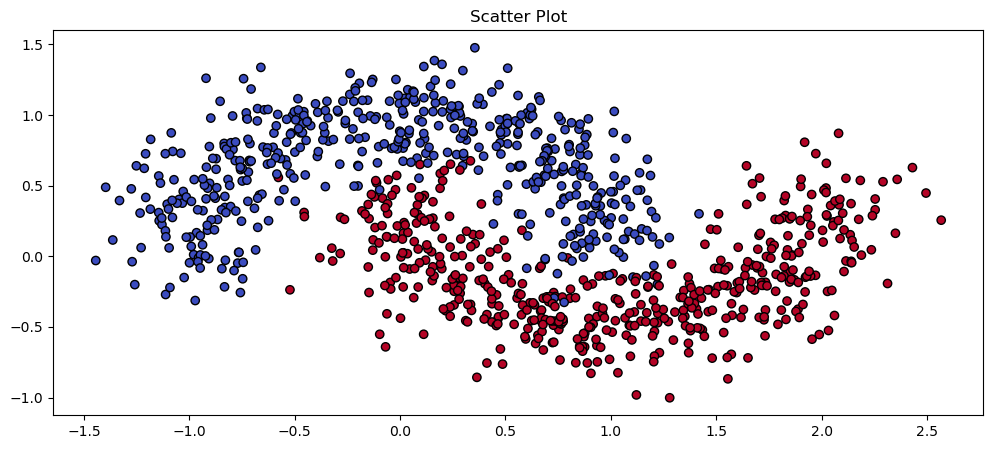

In [4]:
# Plot the noisy data
plt.figure(figsize=(12, 5))

# Plot data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolor='k')
plt.title(f'Scatter Plot')
plt.show()

# Logistic Regression

In [5]:
lg = LogisticRegression()
lg.fit(X_train, y_train)

LogisticRegression()

# Predict

In [6]:
y_pred= lg.predict(X_test)

# Evaluate

In [7]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.8467
Precision: 0.8581
Recall: 0.8471
F1 Score: 0.8526
Confusion Matrix:
[[121  22]
 [ 24 133]]


In [8]:
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.85
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       143
           1       0.86      0.85      0.85       157

    accuracy                           0.85       300
   macro avg       0.85      0.85      0.85       300
weighted avg       0.85      0.85      0.85       300



# Plot

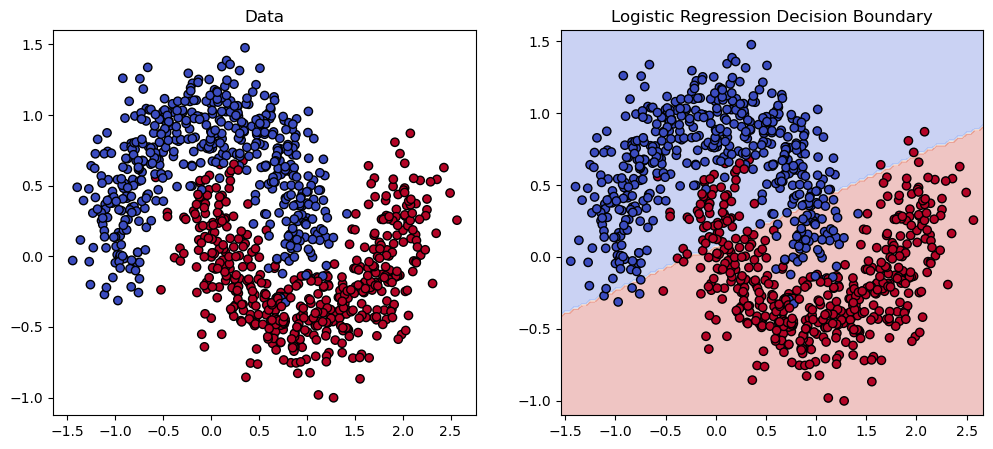

In [9]:
# Plot decision boundary
plt.figure(figsize=(12, 5))

# Plot data
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolor='k')
plt.title('Data')

# Plot decision boundary for Logistic Regression
plt.subplot(1, 2, 2)
xx, yy = np.meshgrid(np.linspace(X[:, 0].min() - 0.1, X[:, 0].max() + 0.1, 100),
                     np.linspace(X[:, 1].min() - 0.1, X[:, 1].max() + 0.1, 100))
Z = lg.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolor='k')
plt.title('Logistic Regression Decision Boundary')
plt.show()


# Build Neural Network

In [10]:
X_train.shape[1]

2

In [11]:
model = Sequential([
    Dense(100, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(100, activation='relu'),
    Dense(1, activation='sigmoid')
])

c:\Users\PC\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 100)            │           300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,501 (41.02 KB)

 Trainable params: 10,501 (41.02 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2, verbose=1)


Epoch 1/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.8066 - loss: 0.6304 - val_accuracy: 0.8286 - val_loss: 0.5218
Epoch 2/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8427 - loss: 0.4495 - val_accuracy: 0.8357 - val_loss: 0.4190
Epoch 3/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8498 - loss: 0.3486 - val_accuracy: 0.8357 - val_loss: 0.3707
Epoch 4/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8649 - loss: 0.2936 - val_accuracy: 0.8500 - val_loss: 0.3518
Epoch 5/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8662 - loss: 0.2783 - val_accuracy: 0.8500 - val_loss: 0.3399
Epoch 6/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8739 - loss: 0.2796 - val_accuracy: 0.8571 - val_loss: 0.3276
Epoch 7/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8701 - loss: 0.2610 - val_accuracy: 0.8571 - val_loss: 0.3247
Epoch 8/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8836 - loss: 0.2713 - val_accuracy: 0.8643 - val_loss

# Plot

In [14]:
metrics=pd.DataFrame(model.history.history)

<Axes: >

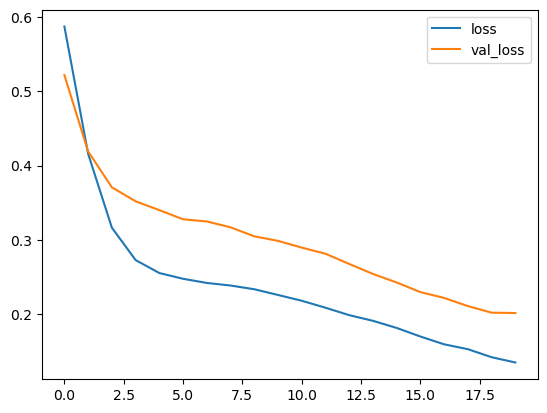

In [15]:
metrics[['loss','val_loss']].plot()

<Axes: >

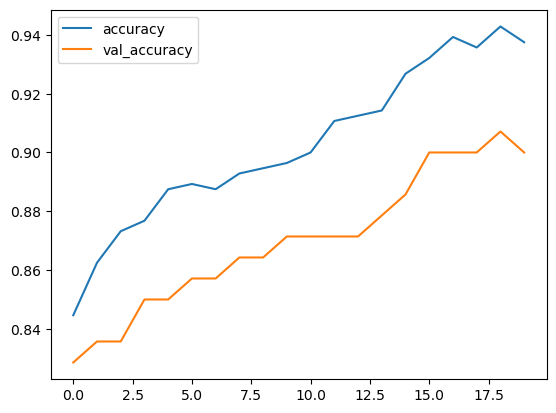

In [16]:
metrics[['accuracy', 'val_accuracy']].plot()

# Predict

In [17]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


In [18]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.9300
Precision: 0.9250
Recall: 0.9427
F1 Score: 0.9338
Confusion Matrix:
[[131  12]
 [  9 148]]


In [19]:
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.93
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.92      0.93       143
           1       0.93      0.94      0.93       157

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300



# Plot

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 525us/step


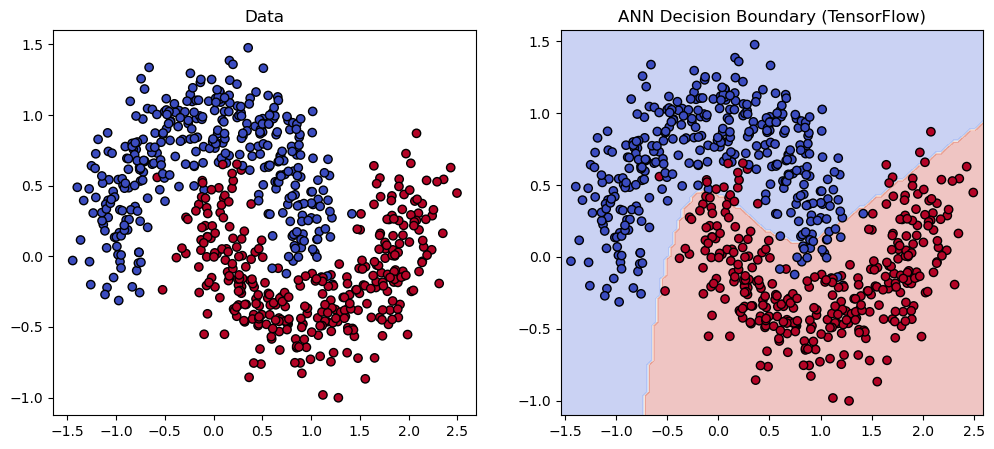

In [20]:
plt.figure(figsize=(12, 5))

# Plot data
plt.subplot(1, 2, 1)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='coolwarm', edgecolor='k')
plt.title('Data')

# Plot decision boundary for ANN
plt.subplot(1, 2, 2)
xx, yy = np.meshgrid(np.linspace(X_train[:, 0].min() - 0.1, X_train[:, 0].max() + 0.1, 100),
                     np.linspace(X_train[:, 1].min() - 0.1, X_train[:, 1].max() + 0.1, 100))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = (Z > 0.5).astype("int32").reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='coolwarm', edgecolor='k')
plt.title('ANN Decision Boundary (TensorFlow)')
plt.show()


# Test

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 521us/step


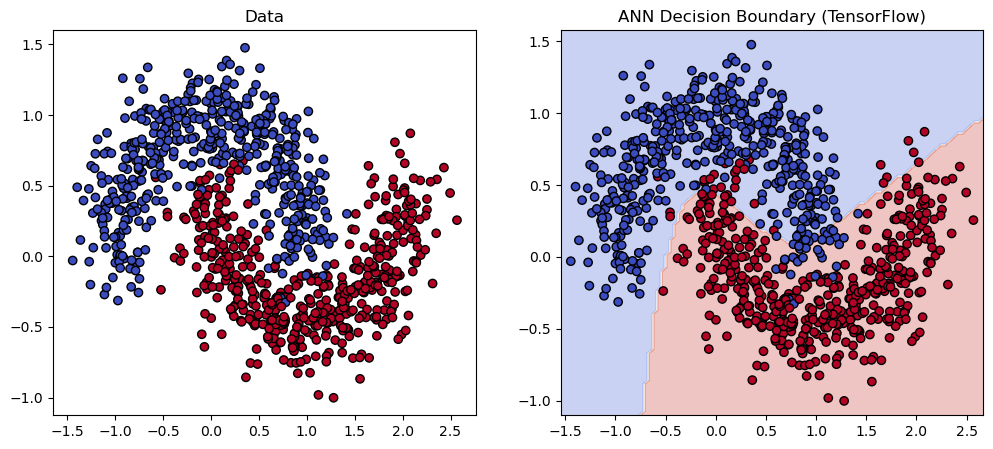

In [21]:
plt.figure(figsize=(12, 5))

# Plot data
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolor='k')
plt.title('Data')

# Plot decision boundary for ANN
plt.subplot(1, 2, 2)
xx, yy = np.meshgrid(np.linspace(X[:, 0].min() - 0.1, X[:, 0].max() + 0.1, 100),
                     np.linspace(X[:, 1].min() - 0.1, X[:, 1].max() + 0.1, 100))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = (Z > 0.5).astype("int32").reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolor='k')
plt.title('ANN Decision Boundary (TensorFlow)')
plt.show()
